In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Datadirectory = "Dataset/train/"

In [3]:
Classes = ["0","1","2","3"]

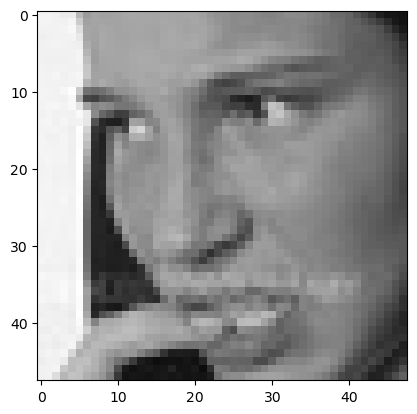

In [4]:
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb b = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB)
        plt. imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


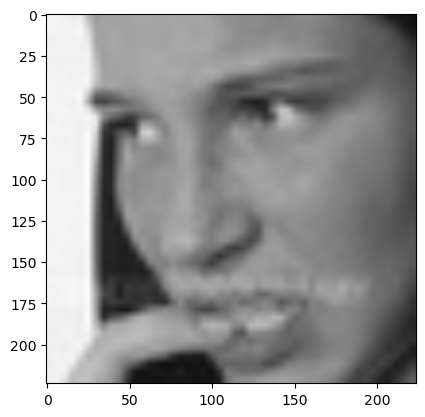

In [5]:
img_size= 224 ## ImageNet => 224 x 224
new_array= cv2.resize(img_array, (img_size, img_size))
plt. imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
new_array.shape

(224, 224, 3)

# Reading all that images and storing in a array

In [7]:
training_Data = [] ## data array
 
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

21107


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = [] ## data /feature

y = [] ## Label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension 

In [12]:
X.shape

(21107, 224, 224, 3)

In [13]:
# narmalizing the Data 

X = X/255.0 ## 255 is the highest number for color (black)

In [14]:
y[0]

0

In [15]:
Y = np.array(y)

In [16]:
Y.shape

(21107,)

# Deep Learning Model for training - Transfer Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [19]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer Learning - Tuning, Weights will start from last check point

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-2].output

In [22]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

#  Model training

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [29]:
new_model.fit(X,Y, epochs = 25)

Epoch 1/25
660/660 [==============================] - 1314s 2s/step - loss: 0.9023 - accuracy: 0.6219
Epoch 2/25
660/660 [==============================] - 1254s 2s/step - loss: 0.7745 - accuracy: 0.6791
Epoch 3/25
660/660 [==============================] - 1257s 2s/step - loss: 0.7209 - accuracy: 0.7050
Epoch 4/25
660/660 [==============================] - 1261s 2s/step - loss: 0.6785 - accuracy: 0.7279
Epoch 5/25
660/660 [==============================] - 1258s 2s/step - loss: 0.6340 - accuracy: 0.7466
Epoch 6/25
660/660 [==============================] - 1255s 2s/step - loss: 0.6044 - accuracy: 0.7611
Epoch 7/25
660/660 [==============================] - 1256s 2s/step - loss: 0.5569 - accuracy: 0.7801
Epoch 8/25
660/660 [==============================] - 1258s 2s/step - loss: 0.5214 - accuracy: 0.7959
Epoch 9/25
660/660 [==============================] - 1257s 2s/step - loss: 0.4759 - accuracy: 0.8143
Epoch 10/25
660/660 [==============================] - 1255s 2s/step - loss: 0.433

# Testing the model

In [30]:
Datadirectory = "Dataset/test/"

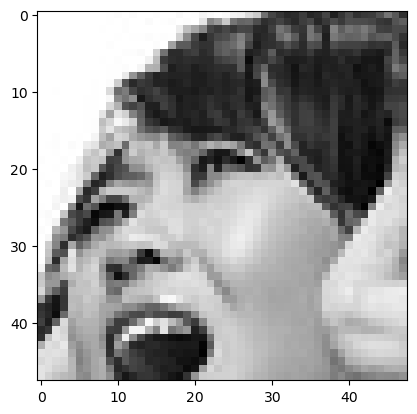

In [31]:
Classes = ["0","1","2","3"]

for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb b = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB)
        plt. imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


In [32]:
test_Data = [] ## data array
 
def create_test_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                test_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [33]:
create_test_Data()

In [34]:
print(len(test_Data))

5278


In [35]:
N = [] ## data /feature

m = [] ## Label

for features, label in test_Data:
    N.append(features)
    m.append(label)

N = np.array(N).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension 

In [36]:
N.shape

(5278, 224, 224, 3)

In [37]:
# narmalizing the Data 

N = N/255.0 ## 255 is the highest number for color (black)

In [38]:
m[0]

0

In [39]:
M = np.array(m)

In [40]:
M.shape

(5278,)

In [41]:
new_model.evaluate(N,M)

165/165 [==============================] - 61s 357ms/step - loss: 1.6199 - accuracy: 0.6317


[1.6199218034744263, 0.6316786408424377]

# Converting model to TFLite


In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Gaurav\AppData\Local\Temp\tmpkdbf81on\assets


INFO:tensorflow:Assets written to: C:\Users\Gaurav\AppData\Local\Temp\tmpkdbf81on\assets
